# Análise de Risco País

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Definição dos países e ativos relacionados (taxas de câmbio)
ativos_cambio = {
    "Brasil": "BRL=X",
    "EUA": "DXY",
    "Zona do Euro": "EURUSD=X",
    "Japão": "JPY=X",
    "Reino Unido": "GBPUSD=X"
}

In [3]:
# Dados históricos
fim = datetime.now()
inicio = fim - pd.DateOffset(years=5)  # Últimos 5 anos

dados_cambio = yf.download(list(ativos_cambio.values()), start=inicio.strftime('%Y-%m-%d'), end=fim.strftime('%Y-%m-%d'))["Adj Close"]
dados_cambio.columns = ativos_cambio.keys()

[*********************100%***********************]  5 of 5 completed


In [4]:
# Calcular retornos diários
retornos_cambio = dados_cambio.pct_change().dropna()

# Volatilidade anualizada (indicador de risco cambial)
volatilidade_cambial = retornos_cambio.std() * np.sqrt(252)

# Variação acumulada em 5 anos (indicador econômico)
variacao_acumulada = (dados_cambio.iloc[-1] / dados_cambio.iloc[0] - 1) * 100

C:\Users\elias\AppData\Local\Temp\ipykernel_14124\1726387983.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos_cambio = dados_cambio.pct_change().dropna()


In [5]:
# Normalizar os valores para o intervalo [0, 1]
volatilidade_normalizada = volatilidade_cambial / volatilidade_cambial.max()
variacao_normalizada = variacao_acumulada.abs() / variacao_acumulada.abs().max()

# Combinar os indicadores em um score final (média simples)
score_risco = (volatilidade_normalizada + variacao_normalizada) / 2

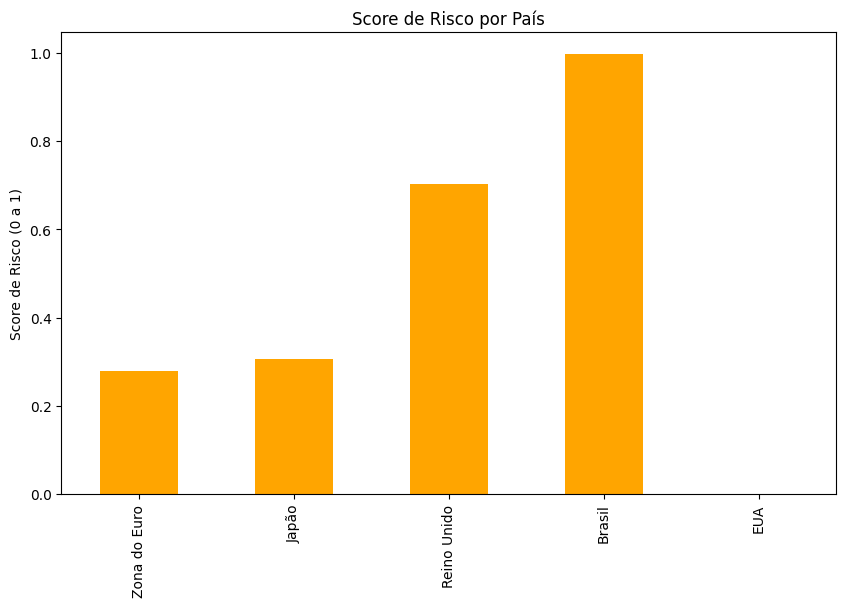

In [6]:
# Gráfico de score de risco
score_risco.sort_values().plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Score de Risco por País")
plt.ylabel("Score de Risco (0 a 1)")
plt.show()